# Analysis of PolyaClassifier site definition for *S. cerevisiae*

**Purpose**: To identify 6mer motifs important to cleavage site definition in *S. cerevisiae* through a systematic mutation approach.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%run -i notebook_setup.py

## IMPORTS AND SETUP

In [4]:
from paper_utilities import motifs

In [5]:
species   = 'saccharomyces_cerevisiae'
modeltype = 'polyaclassifier'
config    = 'polyaclassifier_bagging3_kmers-6'
kmer      = 6


In [6]:
PROJECT   = "/projects/b1080/eks/polyadenylation/yeast"
OUTDIR    = os.path.join(PROJECT, 'manuscript', 'analysis', 'polyaclassifier_motif_importance_scer_6mers')
RESOURCES = os.path.join(os.path.dirname(OUTDIR), 'resources')
os.makedirs(OUTDIR, exist_ok = True)


In [7]:
## Load model configuration information

with open(os.path.join(RESOURCES, 'polyaclassifier_configurations.pickle'), mode = 'rb') as handle:
    configurations = pickle.load(handle)

gold_sites = configurations[species][config]['golden_lines']
print("\nNumber of golden sites:", gold_sites)

mot_dis_dir = os.path.join(PROJECT, species, 'analysis', 'motif_analysis', 'motif_disruption', config)
print("\nDirectory containing motif disruption results:", mot_dis_dir)



Number of golden sites: 11673

Directory containing motif disruption results: /projects/b1080/eks/polyadenylation/yeast/saccharomyces_cerevisiae/analysis/motif_analysis/motif_disruption/polyaclassifier_bagging3_kmers-6


In [8]:
## Load motif family definitions for S. cerevisiae

scer_definitions = {'patterns' : {}, 'distance' : {}}

# By pattern - we only look at pattern families for 6mers
with open(os.path.join(RESOURCES, f'motif_definitions.scer.6mers.patterns.pickle'), mode = 'rb') as handle:
    scer_definitions['patterns'][6] = pickle.load(handle)
    
scer_definitions['patterns'][5] = {'family':{}}
scer_definitions['patterns'][4] = {'family':{}}

# By Hamming distance
for kmer in [4,5,6]:
    with open(os.path.join(RESOURCES, f'motif_definitions.scer.{kmer}mers.distance.pickle'), mode = 'rb') as handle:
        scer_definitions['distance'][kmer] = pickle.load(handle)


In [9]:
## Load processed motif importance data

with open(os.path.join(RESOURCES, 'polyaclassifier_motifs.summaries.pickle'), mode = 'rb') as handle:
    motif_summaries = pickle.load(handle)
    
cond1 = (motif_summaries['species'] == species)
cond2 = (motif_summaries['modeltype'] == modeltype)
cond3 = (motif_summaries['kmer'] == kmer)
    
motif_summaries = motif_summaries.loc[cond1 & cond2 & cond3].copy()
print(motif_summaries.shape)


(4096, 28)


In [10]:
with open(os.path.join(RESOURCES, 'polyaclassifier_motifs.family_profiles.pickle'), mode = 'rb') as handle:
    mfam_importance = pickle.load(handle)
    

In [11]:
with open(os.path.join(RESOURCES, 'polyaclassifier_motifs.significant_motifs.pickle'), mode = 'rb') as handle:
    significant_motifs = pickle.load(handle)
    
sigmots = significant_motifs[species][modeltype][config]
    
with open(os.path.join(OUTDIR, 'region_significant_motif_list.cerevisiae.6mers.pickle'), mode = 'wb') as handle:
    pickle.dump(sigmots, handle)


# ANALYSIS

In [12]:
family_cmap = {
    'A-rich'        : '#2278B5',
    'A-rich_d0'     : '#2278B5',
    'A-rich_d1'     : '#6AB1E3',
    'A-rich_d2'     : '#9CCBEC',
    'T-rich'        : '#2FA148',
    'T-rich_d0'     : '#2FA148',
    'T-rich_d1'     : '#73D689',
    'T-rich_d2'     : '#A1E4B0',
    'TA/TA-rich'    : '#D62A28',
    'TA/TA-rich_d0' : '#D62A28',
    'TA/TA-rich_d1' : '#E77F7E',
    'TA/TA-rich_d2' : '#EFAAA9',
    'G/A-rich'      : '#956CB4',
    'G/A-rich_d0'   : '#956CB4',
    'Other'         : '#F7F8F8',
    'Pattern'       : '#000000',
}


## Motif family profiles

#### Examples of individual motifs

In [13]:
example_motifs = {
    'TATATA' : {
        'frequency' : {'ylim' : (0,200), 'ytick' : 50},
        'persite'   : {'ylim' : (-1,5),  'ytick' : 2}
    },
    'TATGTA' : {
        'frequency' : {'ylim' : (0,75),  'ytick' : 25},
        'persite'   : {'ylim' : (-1,5),  'ytick' : 2}
    },
    'CTATAT' : {
        'frequency' : {'ylim' : (0,30),  'ytick' : 15},
        'persite'   : {'ylim' : (-1,5),  'ytick' : 2}
    },
    'AAATTT' : {
        'frequency' : {'ylim' : (0,40),  'ytick' : 20},
        'persite'   : {'ylim' : (-1,5),  'ytick' : 2}
    },
}


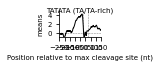

Max 4.150 @ -33


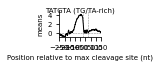

Max 4.077 @ -45


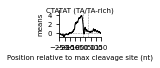

Max 3.800 @ -35


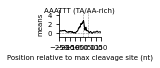

Max 2.731 @ -19


In [14]:
## Plot per-site importance profiles

for m,mdict in example_motifs.items():
    
    mdt = motif_summaries.loc[(motif_summaries['species'] == species) & (motif_summaries['modeltype'] == modeltype) & (motif_summaries['testMotif'] == m)].iloc[0]
    
    motifs.motif_profile(OUTDIR, m, scer_definitions['patterns'][6]['family'][m], 'means', mdt['xs'], mdt['means'], 
                         smoothing = 10, region = (-250,150), region_tick = 50, 
                         ylim = mdict['persite']['ylim'], ytick = mdict['persite']['ytick'],
                         figsize = (0.75,0.5), verbose = True)
    

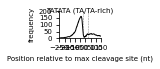

Max 161.500 @ -41


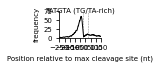

Max 60.600 @ -42


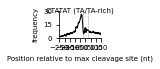

Max 26.700 @ -40


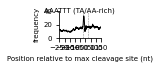

Max 33.000 @ -16


In [15]:
## Plot frequency profiles

for m,mdict in example_motifs.items():
    
    mdt = motif_summaries.loc[(motif_summaries['species'] == species) & (motif_summaries['modeltype'] == modeltype) & (motif_summaries['testMotif'] == m)].iloc[0]
    
    motifs.motif_profile(OUTDIR, m, scer_definitions['patterns'][6]['family'][m], 'frequency', mdt['xs'], mdt['freqs'], 
                         smoothing = 10, region = (-250,150), region_tick = 50, 
                         ylim = mdict['frequency']['ylim'], ytick = mdict['frequency']['ytick'],
                         figsize = (0.75,0.5), verbose = True)


#### Examples of U- and A- containing motifs that show variable peaks in importance across the upstream region

In [16]:
example_motifs = ['TATATA','ATATAT','ATATAA','ATAATA','AATAAA','TAAAAA','AAAAAA']
example_colors = sns.color_palette('rainbow', len(example_motifs))


TATATA: Peak frequency 161.5 @ -41; Weighted mean frequency @ -63.52
ATATAT: Peak frequency 133.5 @ -50; Weighted mean frequency @ -64.21
ATATAA: Peak frequency  58.4 @ -38; Weighted mean frequency @ -58.96
ATAATA: Peak frequency  51.6 @ -23; Weighted mean frequency @ -59.69
AATAAA: Peak frequency  52.7 @ -21; Weighted mean frequency @ -65.32
TAAAAA: Peak frequency  41.5 @ -22; Weighted mean frequency @ -72.01
AAAAAA: Peak frequency  62.7 @ -117; Weighted mean frequency @ -84.28


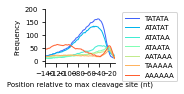

In [17]:
fig,ax = plt.subplots(1,1, figsize = (1.25,1))

smoothing = 10
region = (-140,-10)

for i,m in enumerate(example_motifs):
    
    mdt   = motif_summaries.loc[(motif_summaries['species'] == species) & (motif_summaries['modeltype'] == modeltype) & (motif_summaries['testMotif'] == m)].iloc[0]
    xs    = np.arange(region[0]-(smoothing/2), region[1]+(smoothing/2)+1)
    mdict = dict(zip(mdt['xs'],mdt['freqs']))
    freqs = np.asarray([mdict.get(x,0) for x in xs])
    freqs_smooth = pd.Series(freqs).rolling(window = smoothing, center = True).mean().to_numpy().flatten()
    
    xs_cut    = xs[int(smoothing/2):int(region[1]-region[0]+(smoothing/2))]
    freqs_cut = freqs_smooth[int(smoothing/2):int(region[1]-region[0]+(smoothing/2))]
    print(f"{m}: Peak frequency {np.nanmax(freqs_cut):5.01f} @ {xs_cut[np.nanargmax(freqs_cut)]:.0f}; Weighted mean frequency @ {np.average(xs_cut, weights = freqs_cut):.02f}")

    sns.lineplot(x = xs, y = freqs_smooth, color = example_colors[i], label = m, lw = 1, ax = ax)

ax.set_xlim(region)
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.set_xlabel("Position relative to max cleavage site (nt)")

ax.set_ylabel("Frequency")
ax.set_ylim(-10,200)
ax.yaxis.set_major_locator(MultipleLocator(50))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor = (1.05,1))

plt.savefig(os.path.join(OUTDIR, 'individual_examples.ta_to_a_rich.frequency.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()
    

TATATA: Peak per-site 4.150 @ -33; Weighted mean per-site @ -64.93
ATATAT: Peak per-site 3.555 @ -35; Weighted mean per-site @ -64.55
ATATAA: Peak per-site 4.168 @ -37; Weighted mean per-site @ -50.84
ATAATA: Peak per-site 3.372 @ -24; Weighted mean per-site @ -39.05
AATAAA: Peak per-site 2.954 @ -21; Weighted mean per-site @ -39.48
TAAAAA: Peak per-site 2.821 @ -20; Weighted mean per-site @ -34.85
AAAAAA: Peak per-site 2.073 @ -21; Weighted mean per-site @ -53.30


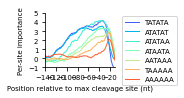

In [18]:
fig,ax = plt.subplots(1,1, figsize = (1.25,1))

smoothing = 10
region = (-140,-10)

for i,m in enumerate(example_motifs):
    
    mdt   = motif_summaries.loc[(motif_summaries['species'] == species) & (motif_summaries['modeltype'] == modeltype) & (motif_summaries['testMotif'] == m)].iloc[0]
    xs    = np.arange(region[0]-(smoothing/2), region[1]+(smoothing/2))
    mdict = dict(zip(mdt['xs'],mdt['means']))
    means = np.asarray([mdict.get(x,0) for x in xs])
    means_smooth = pd.Series(means).rolling(window = smoothing, center = True).mean().to_numpy().flatten()
    
    xs_cut    = xs[int(smoothing/2):int(region[1]-region[0]+(smoothing/2))]
    means_cut = means_smooth[int(smoothing/2):int(region[1]-region[0]+(smoothing/2))]
    print(f"{m}: Peak per-site {np.nanmax(means_cut):5.03f} @ {xs_cut[np.nanargmax(means_cut)]:.0f}; Weighted mean per-site @ {np.average(xs_cut, weights = means_cut):.02f}")

    sns.lineplot(x = xs, y = means_smooth, color = example_colors[i], label = m, lw = 1, ax = ax)

ax.set_xlim(region)
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.set_xlabel("Position relative to max cleavage site (nt)")

ax.set_ylabel("Per-site importance")
ax.set_ylim(-1,5)
ax.yaxis.set_major_locator(MultipleLocator(1))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor = (1.05,1))

plt.savefig(os.path.join(OUTDIR, 'individual_examples.ta_to_a_rich.persite.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()
    

## Overall motif family importance profiles

#### Individual motif families

contains_TA : Peak frequency 42.455 @ -40


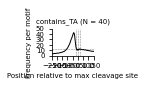

contains_TG : Peak frequency 33.718 @ -42


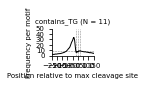

contains_TC : Peak frequency 22.233 @ -41


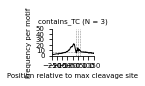

contains_TT : Peak frequency 35.590 @ -41


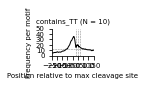

In [19]:
region = (-250,150)
smoothing = 10

ylim_hamming = (0,250)
ylim_family  = (0,50)
ylim_cluster = (0,50)

for motfam,motdict in mfam_importance[species][modeltype][config].items():
    if ('contains' in motfam):
        try:

            if (motfam.startswith('hamming_')):
                motcolor = family_cmap[motfam.replace("hamming_", "")]
            else:
                motcolor = 'black'

            fig,ax = plt.subplots(1,1, figsize = (0.75,0.5))

            xs           = motdict['data']['xs']
            means        = motdict['data']['freqs'] / len(motdict['motifs'])
            means_smooth = pd.Series(means).rolling(window = smoothing, center = True).mean()

            sns.lineplot(x = xs, y = means_smooth, color = motcolor, label = motfam, lw = 1, ax = ax)
            print(f"{motfam:12}: Peak frequency {np.nanmax(means_smooth):5.03f} @ {xs[np.nanargmax(means_smooth)]:.0f}")

            ax.axhline(y = np.nanmean(means_smooth), linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)
            ax.axvline(x = 0,   linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)
            ax.axvline(x = -20, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)
            ax.axvline(x = 20,  linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)

            ax.set_xlim(region)
            ax.xaxis.set_major_locator(MultipleLocator(50))
            ax.set_xlabel("Position relative to max cleavage site")

            ax.set_ylim(0,50)
            ax.yaxis.set_major_locator(MultipleLocator(10))
            ax.set_ylabel("Frequency per motif")

            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            ax.set_title(f"{motfam} (N = {len(motdict['motifs'])})", fontsize = 7)
            ax.get_legend().remove()

            plt.savefig(os.path.join(OUTDIR, f'family_importance.{motfam.replace("/","")}.frequency.svg'), format = 'svg', dpi = 600, transparent = True)
            plt.show()

        except KeyError:
            plt.close()
            continue


contains_TA : Peak per-site 3.557 @ -39


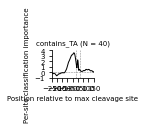

contains_TG : Peak per-site 3.576 @ -41


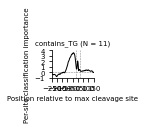

contains_TC : Peak per-site 3.262 @ -35


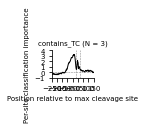

contains_TT : Peak per-site 3.444 @ -39


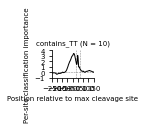

In [20]:
region = (-250,150)
smoothing = 10

for motfam,motdict in mfam_importance[species][modeltype][config].items():
    if ('contains' in motfam):
        try:

            if (motfam.startswith('hamming_')):
                motcolor = family_cmap[motfam.replace("hamming_", "")]
            else:
                motcolor = 'black'

            fig,ax = plt.subplots(1,1, figsize = (0.75,0.5))

            xs           = motdict['data']['xs']
            means        = -1*motdict['data']['means']
            means_smooth = pd.Series(means).rolling(window = smoothing, center = True).mean()

            sns.lineplot(x = xs, y = means_smooth, color = motcolor, label = motfam, lw = 1, ax = ax)
            print(f"{motfam:12}: Peak per-site {np.nanmax(means_smooth):5.03f} @ {xs[np.nanargmax(means_smooth)]:.0f}")

            ax.axhline(y = 0,   linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)
            ax.axvline(x = -20, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)
            ax.axvline(x = 20,  linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)

            ax.set_xlim(region)
            ax.xaxis.set_major_locator(MultipleLocator(50))
            ax.set_xlabel("Position relative to max cleavage site")

            ax.set_ylim((-1,4))
            ax.yaxis.set_major_locator(MultipleLocator(1))
            ax.set_ylabel("Per-site classification importance")

            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            ax.set_title(f"{motfam} (N = {len(motdict['motifs'])})", fontsize = 7)
            ax.get_legend().remove()

            plt.savefig(os.path.join(OUTDIR, f'family_importance.{motfam.replace("/","")}.per_site.svg'), format = 'svg', dpi = 600, transparent = True)
            plt.show()

        except KeyError:
            plt.close()
            continue


#### Family importance profiles using motif-normalized sum importance scores

hamming_A-rich    : Peak sum-norm  47.382 @ -21
hamming_T-rich    : Peak sum-norm  93.640 @ -2
hamming_TA/TA-rich: Peak sum-norm 129.323 @ -40


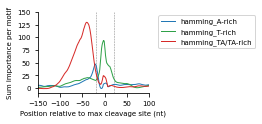

In [21]:
fig,ax = plt.subplots(1,1, figsize = (2,1.5))

region = (-150,100)
smoothing = 10

ylims = (-10,150)

for motfam,motdict in mfam_importance[species][modeltype][config].items():
    
    if ("_d" in motfam) or ("pattern_" in motfam) or ("contains" in motfam):
        continue
    
    xs           = motdict['data']['xs']
    means        = -1*motdict['data']['means_weights'] / len(motdict['motifs'])
    means_smooth = pd.Series(means).rolling(window = smoothing, center = True).mean()
    print(f"{motfam:18}: Peak sum-norm {np.nanmax(means_smooth):7.03f} @ {xs[np.nanargmax(means_smooth)]:.0f}")

    sns.lineplot(x = xs, y = means_smooth, color = family_cmap[motfam.replace("hamming_","")], label = motfam, lw = 1, ax = ax)

for x in [-20,20]:
    ax.axvline(x = x, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)

ax.set_xlim(region)
ax.xaxis.set_major_locator(MultipleLocator(50))

ax.set_ylim(ylims)
ax.yaxis.set_major_locator(MultipleLocator(25))
ax.set_ylabel("Sum importance per motif")
ax.set_xlabel("Position relative to max cleavage site (nt)")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor = (1.05,1))

plt.savefig(os.path.join(OUTDIR, 'family_consolidated.sum_norm.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


#### Breakdown of family importance profiles by Hamming distance

hamming_A-rich_d0    : Peak per-site 2.073 @ -21
hamming_A-rich_d1    : Peak per-site 2.431 @ -21
hamming_A-rich_d2    : Peak per-site 2.499 @ -22
hamming_T-rich_d0    : Peak per-site 2.801 @ 7
hamming_T-rich_d1    : Peak per-site 3.843 @ -2
hamming_T-rich_d2    : Peak per-site 3.595 @ -2
hamming_TA/TA-rich_d0: Peak per-site 3.883 @ -33
hamming_TA/TA-rich_d1: Peak per-site 3.534 @ -40
hamming_TA/TA-rich_d2: Peak per-site 3.455 @ -38


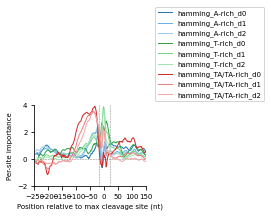

In [22]:
fig,ax = plt.subplots(1,1, figsize = (2,1.5))

region = (-250,150)
smoothing = 10

ylims = (-2,4)

for motfam,motdict in mfam_importance[species][modeltype][config].items():
    
    if ("_d" not in motfam):
        continue
    
    xs           = motdict['data']['xs']
    means        = -1*motdict['data']['means']
    means_smooth = pd.Series(means).rolling(window = smoothing, center = True).mean()
    print(f"{motfam:21}: Peak per-site {np.nanmax(means_smooth):5.03f} @ {xs[np.nanargmax(means_smooth)]:.0f}")

    sns.lineplot(x = xs, y = means_smooth, color = family_cmap[motfam.replace("hamming_","")], label = motfam, lw = 1, ax = ax)

ax.axhline(y = 0,   linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)

for x in [-20,20]:
    ax.axvline(x = x, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)

ax.set_xlim(region)
ax.xaxis.set_major_locator(MultipleLocator(50))

ax.set_ylim(ylims)
ax.set_ylabel("Per-site importance")
ax.set_xlabel("Position relative to max cleavage site (nt)")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor = (1.05,1))

plt.savefig(os.path.join(OUTDIR, 'family_breakdown.persite.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


hamming_A-rich_d0    : Peak per-site 84.500 @ 64
hamming_A-rich_d1    : Peak per-site 30.492 @ -21
hamming_A-rich_d2    : Peak per-site 15.394 @ -21
hamming_T-rich_d0    : Peak per-site 215.500 @ 7
hamming_T-rich_d1    : Peak per-site 44.211 @ -8
hamming_T-rich_d2    : Peak per-site 21.694 @ -6
hamming_TA/TA-rich_d0: Peak per-site 145.950 @ -43
hamming_TA/TA-rich_d1: Peak per-site 41.531 @ -40
hamming_TA/TA-rich_d2: Peak per-site 23.378 @ -41


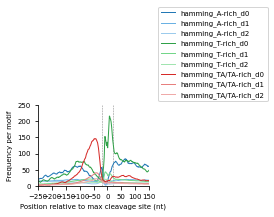

In [23]:
fig,ax = plt.subplots(1,1, figsize = (2,1.5))

region = (-250,150)
smoothing = 10

ylims = (0,None)

for motfam,motdict in mfam_importance[species][modeltype][config].items():
    
    if ("_d" not in motfam):
        continue
    
    xs           = motdict['data']['xs']
    means        = motdict['data']['freqs'] / len(motdict['motifs'])
    means_smooth = pd.Series(means).rolling(window = smoothing, center = True).mean()
    print(f"{motfam:21}: Peak per-site {np.nanmax(means_smooth):5.03f} @ {xs[np.nanargmax(means_smooth)]:.0f}")

    sns.lineplot(x = xs, y = means_smooth, color = family_cmap[motfam.replace("hamming_","")], label = motfam, lw = 1, ax = ax)

for x in [-20,20]:
    ax.axvline(x = x, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)

ax.set_xlim(region)
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.set_xlabel("Position relative to max cleavage site (nt)")

ax.set_ylim(0,250)
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.set_ylabel("Frequency per motif")


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor = (1.05,1))

plt.savefig(os.path.join(OUTDIR, 'family_breakdown.frequency.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


## Region-specific peak importance by Hamming distance

#### Narrow region for UA-rich

In [24]:
hamming_comparison = {}

hamming_families = ['TA/TA-rich_d0','TA/TA-rich_d1','TA/TA-rich_d2','A-rich_d0','A-rich_d1','A-rich_d2','T-rich_d0','T-rich_d1','T-rich_d2','T-rich_d0','T-rich_d1','T-rich_d2']
hamming_regions = [(-90,-26),(-90,-26),(-90,-26),(-25,-16),(-25,-16),(-25,-16),(-15,-6),(-15,-6),(-15,-6),(2,15),(2,15),(2,15)]

for mfam,mreg in zip(hamming_families, hamming_regions):

    mlist = [m for m,f in scer_definitions['distance'][kmer]['hamming'].items() if (m in sigmots) and (f == mfam)]

    mdataClass = motifs.region_data(OUTDIR, mot_dis_dir, mlist, mreg, 'summary_agg', 'position', 'differenceClassification', measure = 'mean', measure_error = 95)

    mdataClass['motifFamily'] = mfam
    mdataClass['motifRegion'] = f'{mreg[0]}_{mreg[1]}'
    mdataClass['motifDesc'] = mdataClass['motifFamily'] + "_" + mdataClass['motifRegion']

    hamming_comparison[f'{mfam}_{mreg[0]}_{mreg[1]}'] = {'motif_list' : mlist, 'results' : mdataClass}

hamming_comparison = pd.concat([fm['results'] for mfam,fm in hamming_comparison.items()], ignore_index = True, sort = False)
print(hamming_comparison.shape)


(12, 8)


No handles with labels found to put in legend.


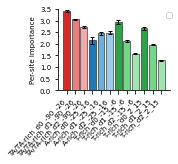

In [25]:
fig,ax = plt.subplots(1,1, figsize = (2,1.5))

xorder = [f'{f}_{str(r).strip("()").replace(", ","_")}' for (f,r) in zip(hamming_families, hamming_regions)]

for i,x in enumerate(xorder):
    
    dt = hamming_comparison.loc[hamming_comparison['motifDesc'] == x].iloc[0]
    
    ax.bar(i, dt['score'], color = family_cmap[dt['motifFamily']], edgecolor = 'black', linewidth = 0.5)
    ax.errorbar(i, dt['score'], yerr = dt['error_hi'], ecolor = 'black', elinewidth = 1, capsize = 2, barsabove = True)
    
ax.set_xticks(np.arange(len(xorder)))
ax.set_xticklabels(xorder, rotation = 45, ha = 'right', va = 'top')
ax.set_xlabel("")

ax.set_ylim(0,3.5)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylabel("Per-site importance")

ax.legend(bbox_to_anchor = (1.05,1))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(os.path.join(OUTDIR, 'hamming_comparison.persite.narrow.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


In [26]:
hamming_comparison.set_index('motifDesc').loc[xorder]

,score,conf_lo,conf_hi,error_lo,error_hi,motifFamily,motifRegion
motifDesc,,,,,,,
TA/TA-rich_d0_-90_-26,3.408265,3.455719,3.360811,0.047454,0.047454,TA/TA-rich_d0,-90_-26
TA/TA-rich_d1_-90_-26,3.053028,3.072800,3.033255,0.019773,0.019773,TA/TA-rich_d1,-90_-26
TA/TA-rich_d2_-90_-26,2.718846,2.766190,2.671502,0.047344,0.047344,TA/TA-rich_d2,-90_-26
A-rich_d0_-25_-16,2.144715,2.286509,2.002922,0.141794,0.141794,A-rich_d0,-25_-16
A-rich_d1_-25_-16,2.445044,2.501866,2.388222,0.056822,0.056822,A-rich_d1,-25_-16
A-rich_d2_-25_-16,2.473021,2.542314,2.403728,0.069293,0.069293,A-rich_d2,-25_-16
T-rich_d0_-15_-6,2.926032,3.022189,2.829876,0.096157,0.096157,T-rich_d0,-15_-6
T-rich_d1_-15_-6,2.107660,2.142565,2.072755,0.034905,0.034905,T-rich_d1,-15_-6
T-rich_d2_-15_-6,1.576282,1.608815,1.543750,0.032533,0.032533,T-rich_d2,-15_-6


In [27]:
## Add percent difference calculations for d1 and d2 vs d0 for each family

# UA-rich family

ua_d0_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'TA/TA-rich_d0_-90_-26'].iloc[0]['score']
ua_d1_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'TA/TA-rich_d1_-90_-26'].iloc[0]['score']
ua_d2_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'TA/TA-rich_d2_-90_-26'].iloc[0]['score']

print(f"\nPercent decrease UA-rich d0 to d1: {(ua_d0_score - ua_d1_score) / ua_d0_score:6.02%}")
print(f"Percent decrease UA-rich d0 to d2: {(ua_d0_score - ua_d2_score) / ua_d0_score:6.02%}")
print(f"Percent decrease UA-rich d1 to d2: {(ua_d1_score - ua_d2_score) / ua_d1_score:6.02%}")


# A-rich family

a_d0_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'A-rich_d0_-25_-16'].iloc[0]['score']
a_d1_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'A-rich_d1_-25_-16'].iloc[0]['score']
a_d2_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'A-rich_d2_-25_-16'].iloc[0]['score']

print(f"\nPercent increase A-rich d0 to d1: {(a_d1_score - a_d0_score) / a_d0_score:6.02%}")
print(f"Percent increase A-rich d0 to d2: {(a_d2_score - a_d0_score) / a_d0_score:6.02%}")
print(f"Percent increase A-rich d1 to d2: {(a_d2_score - a_d1_score) / a_d1_score:6.02%}")


# U-rich family upstream

u_d0_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'T-rich_d0_-15_-6'].iloc[0]['score']
u_d1_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'T-rich_d1_-15_-6'].iloc[0]['score']
u_d2_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'T-rich_d2_-15_-6'].iloc[0]['score']

print(f"\nPercent decrease U-rich d0 to d1: {(u_d0_score - u_d1_score) / u_d0_score:6.02%}")
print(f"Percent decrease U-rich d0 to d2: {(u_d0_score - u_d2_score) / u_d0_score:6.02%}")
print(f"Percent decrease U-rich d1 to d2: {(u_d1_score - u_d2_score) / u_d1_score:6.02%}")


# U-rich family upstream

u_d0_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'T-rich_d0_2_15'].iloc[0]['score']
u_d1_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'T-rich_d1_2_15'].iloc[0]['score']
u_d2_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'T-rich_d2_2_15'].iloc[0]['score']

print(f"\nPercent decrease U-rich d0 to d1: {(u_d0_score - u_d1_score) / u_d0_score:6.02%}")
print(f"Percent decrease U-rich d0 to d2: {(u_d0_score - u_d2_score) / u_d0_score:6.02%}")
print(f"Percent decrease U-rich d1 to d2: {(u_d1_score - u_d2_score) / u_d1_score:6.02%}")




Percent decrease UA-rich d0 to d1: 10.42%
Percent decrease UA-rich d0 to d2: 20.23%
Percent decrease UA-rich d1 to d2: 10.95%

Percent increase A-rich d0 to d1: 14.00%
Percent increase A-rich d0 to d2: 15.31%
Percent increase A-rich d1 to d2:  1.14%

Percent decrease U-rich d0 to d1: 27.97%
Percent decrease U-rich d0 to d2: 46.13%
Percent decrease U-rich d1 to d2: 25.21%

Percent decrease U-rich d0 to d1: 26.62%
Percent decrease U-rich d0 to d2: 51.42%
Percent decrease U-rich d1 to d2: 33.80%


#### Wide region for UA-rich

In [28]:
hamming_comparison = {}

hamming_families = ['TA/TA-rich_d0','TA/TA-rich_d1','TA/TA-rich_d2','A-rich_d0','A-rich_d1','A-rich_d2','T-rich_d0','T-rich_d1','T-rich_d2','T-rich_d0','T-rich_d1','T-rich_d2']
hamming_regions = [(-120,-26),(-120,-26),(-120,-26),(-25,-16),(-25,-16),(-25,-16),(-15,-6),(-15,-6),(-15,-6),(2,15),(2,15),(2,15)]

for mfam,mreg in zip(hamming_families, hamming_regions):

    mlist = [m for m,f in scer_definitions['distance'][kmer]['hamming'].items() if (m in sigmots) and (f == mfam)]

    mdataClass = motifs.region_data(OUTDIR, mot_dis_dir, mlist, mreg, 'summary_agg', 'position', 'differenceClassification', measure = 'mean', measure_error = 95)

    mdataClass['motifFamily'] = mfam
    mdataClass['motifRegion'] = f'{mreg[0]}_{mreg[1]}'
    mdataClass['motifDesc'] = mdataClass['motifFamily'] + "_" + mdataClass['motifRegion']

    hamming_comparison[f'{mfam}_{mreg[0]}_{mreg[1]}'] = {'motif_list' : mlist, 'results' : mdataClass}

hamming_comparison = pd.concat([fm['results'] for mfam,fm in hamming_comparison.items()], ignore_index = True, sort = False)
print(hamming_comparison.shape)


(12, 8)


No handles with labels found to put in legend.


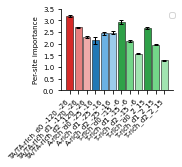

In [29]:
fig,ax = plt.subplots(1,1, figsize = (2,1.5))

xorder = [f'{f}_{str(r).strip("()").replace(", ","_")}' for (f,r) in zip(hamming_families, hamming_regions)]

for i,x in enumerate(xorder):
    
    dt = hamming_comparison.loc[hamming_comparison['motifDesc'] == x].iloc[0]
    
    ax.bar(i, dt['score'], color = family_cmap[dt['motifFamily']], edgecolor = 'black', linewidth = 0.5)
    ax.errorbar(i, dt['score'], yerr = dt['error_hi'], ecolor = 'black', elinewidth = 1, capsize = 2, barsabove = True)
    
ax.set_xticks(np.arange(len(xorder)))
ax.set_xticklabels(xorder, rotation = 45, ha = 'right', va = 'top')
ax.set_xlabel("")

ax.set_ylim(0,3.5)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylabel("Per-site importance")

ax.legend(bbox_to_anchor = (1.05,1))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(os.path.join(OUTDIR, 'hamming_comparison.persite.wide.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


In [30]:
hamming_comparison.set_index('motifDesc').loc[xorder]

,score,conf_lo,conf_hi,error_lo,error_hi,motifFamily,motifRegion
motifDesc,,,,,,,
TA/TA-rich_d0_-120_-26,3.180792,3.223621,3.137962,0.042829,0.042829,TA/TA-rich_d0,-120_-26
TA/TA-rich_d1_-120_-26,2.709838,2.728139,2.691538,0.018301,0.018301,TA/TA-rich_d1,-120_-26
TA/TA-rich_d2_-120_-26,2.272289,2.314900,2.229679,0.042611,0.042611,TA/TA-rich_d2,-120_-26
A-rich_d0_-25_-16,2.144715,2.286509,2.002922,0.141794,0.141794,A-rich_d0,-25_-16
A-rich_d1_-25_-16,2.445044,2.501866,2.388222,0.056822,0.056822,A-rich_d1,-25_-16
A-rich_d2_-25_-16,2.473021,2.542314,2.403728,0.069293,0.069293,A-rich_d2,-25_-16
T-rich_d0_-15_-6,2.926032,3.022189,2.829876,0.096157,0.096157,T-rich_d0,-15_-6
T-rich_d1_-15_-6,2.107660,2.142565,2.072755,0.034905,0.034905,T-rich_d1,-15_-6
T-rich_d2_-15_-6,1.576282,1.608815,1.543750,0.032533,0.032533,T-rich_d2,-15_-6


In [31]:
## Add percent difference calculations for d1 and d2 vs d0 for each family

# UA-rich family

ua_d0_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'TA/TA-rich_d0_-120_-26'].iloc[0]['score']
ua_d1_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'TA/TA-rich_d1_-120_-26'].iloc[0]['score']
ua_d2_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'TA/TA-rich_d2_-120_-26'].iloc[0]['score']

print(f"\nPercent decrease UA-rich d0 to d1: {(ua_d0_score - ua_d1_score) / ua_d0_score:6.02%}")
print(f"Percent decrease UA-rich d0 to d2: {(ua_d0_score - ua_d2_score) / ua_d0_score:6.02%}")
print(f"Percent decrease UA-rich d1 to d2: {(ua_d1_score - ua_d2_score) / ua_d1_score:6.02%}")


# A-rich family

a_d0_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'A-rich_d0_-25_-16'].iloc[0]['score']
a_d1_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'A-rich_d1_-25_-16'].iloc[0]['score']
a_d2_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'A-rich_d2_-25_-16'].iloc[0]['score']

print(f"\nPercent increase A-rich d0 to d1: {(a_d1_score - a_d0_score) / a_d0_score:6.02%}")
print(f"Percent increase A-rich d0 to d2: {(a_d2_score - a_d0_score) / a_d0_score:6.02%}")
print(f"Percent increase A-rich d1 to d2: {(a_d2_score - a_d1_score) / a_d1_score:6.02%}")


# U-rich family upstream

u_d0_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'T-rich_d0_-15_-6'].iloc[0]['score']
u_d1_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'T-rich_d1_-15_-6'].iloc[0]['score']
u_d2_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'T-rich_d2_-15_-6'].iloc[0]['score']

print(f"\nPercent decrease U-rich d0 to d1: {(u_d0_score - u_d1_score) / u_d0_score:6.02%}")
print(f"Percent decrease U-rich d0 to d2: {(u_d0_score - u_d2_score) / u_d0_score:6.02%}")
print(f"Percent decrease U-rich d1 to d2: {(u_d1_score - u_d2_score) / u_d1_score:6.02%}")


# U-rich family upstream

u_d0_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'T-rich_d0_2_15'].iloc[0]['score']
u_d1_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'T-rich_d1_2_15'].iloc[0]['score']
u_d2_score = hamming_comparison.loc[hamming_comparison['motifDesc'] == 'T-rich_d2_2_15'].iloc[0]['score']

print(f"\nPercent decrease U-rich d0 to d1: {(u_d0_score - u_d1_score) / u_d0_score:6.02%}")
print(f"Percent decrease U-rich d0 to d2: {(u_d0_score - u_d2_score) / u_d0_score:6.02%}")
print(f"Percent decrease U-rich d1 to d2: {(u_d1_score - u_d2_score) / u_d1_score:6.02%}")




Percent decrease UA-rich d0 to d1: 14.81%
Percent decrease UA-rich d0 to d2: 28.56%
Percent decrease UA-rich d1 to d2: 16.15%

Percent increase A-rich d0 to d1: 14.00%
Percent increase A-rich d0 to d2: 15.31%
Percent increase A-rich d1 to d2:  1.14%

Percent decrease U-rich d0 to d1: 27.97%
Percent decrease U-rich d0 to d2: 46.13%
Percent decrease U-rich d1 to d2: 25.21%

Percent decrease U-rich d0 to d1: 26.62%
Percent decrease U-rich d0 to d2: 51.42%
Percent decrease U-rich d1 to d2: 33.80%


## Top individual motifs in each region

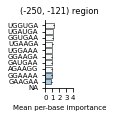

     motif  frequency     score   conf_lo   conf_hi     family  error_lo
95  UGGUGA        767  1.231452  1.297961  1.164943      Other  0.066509
93  UGAUGA       1226  1.101517  1.151071  1.051964      Other  0.049554
63  GGUGAA        824  1.034300  1.093215  0.975385      Other  0.058915
92  UGAAGA       1837  1.009785  1.049763  0.969807      Other  0.039978
94  UGGAAA       1174  0.943873  0.988656  0.899090      Other  0.044783
62  GGAAGA       1102  0.923759  0.973970  0.873548      Other  0.050211
60  GAUGAA       1261  0.916309  0.963118  0.869500      Other  0.046809
24  AGAAGG       1078  0.898876  0.941367  0.856386      Other  0.042491
61  GGAAAA       1339  0.896613  0.935689  0.857537  A-rich_d2  0.039076
57  GAAGAA       2391  0.858065  0.887566  0.828564  A-rich_d2  0.029501
1.297961406704842


In [32]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][6]['hamming'], sigmots, 
                      (-250,-121), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,4), xtickint = 1, verbose = True
                     )


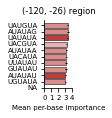

      motif  frequency     score   conf_lo   conf_hi         family  error_lo
83   UAUGUA       2591  3.350811  3.445161  3.256462  TA/TA-rich_d1  0.094349
32   AUAUAG       1488  3.347935  3.482143  3.213728  TA/TA-rich_d1  0.134207
80   UAUAUA       5055  3.325156  3.384050  3.266262  TA/TA-rich_d0  0.058894
73   UACGUA       1029  3.163757  3.298849  3.028665  TA/TA-rich_d2  0.135092
30   AUAUAA       2812  3.136340  3.229998  3.042682  TA/TA-rich_d1  0.093658
72   UACAUA       2384  3.125033  3.211695  3.038372  TA/TA-rich_d1  0.086662
100  UUAUAU       2680  3.098881  3.192436  3.005325  TA/TA-rich_d1  0.093555
64   GUAUAU       2146  3.068901  3.175133  2.962669  TA/TA-rich_d1  0.106232
33   AUAUAU       3933  3.012139  3.074321  2.949958  TA/TA-rich_d0  0.062182
96   UGUAUA       2523  2.995304  3.082180  2.908429  TA/TA-rich_d1  0.086876
3.4821426397926474


In [33]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][6]['hamming'], sigmots, 
                      (-120,-26), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,4), xtickint = 1, verbose = True
                     )


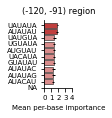

     motif  frequency     score   conf_lo   conf_hi         family  error_lo
80  UAUAUA        815  1.852800  1.956486  1.749115  TA/TA-rich_d0  0.103685
33  AUAUAU        678  1.810462  1.920440  1.700484  TA/TA-rich_d0  0.109978
83  UAUGUA        420  1.429488  1.591200  1.267775  TA/TA-rich_d1  0.161712
96  UGUAUA        394  1.417020  1.579763  1.254278  TA/TA-rich_d1  0.162742
38  AUGUAU        323  1.391860  1.567071  1.216650  TA/TA-rich_d1  0.175210
72  UACAUA        336  1.365311  1.534581  1.196042  TA/TA-rich_d1  0.169270
64  GUAUAU        342  1.360044  1.563008  1.157079  TA/TA-rich_d1  0.202965
31  AUAUAC        353  1.280650  1.454941  1.106360  TA/TA-rich_d1  0.174291
32  AUAUAG        250  1.267841  1.482248  1.053435  TA/TA-rich_d1  0.214407
29  AUACAU        287  1.220135  1.406996  1.033275  TA/TA-rich_d1  0.186861
1.9564857191823204


In [34]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][6]['hamming'], sigmots, 
                      (-120,-91), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,4), xtickint = 1, verbose = True
                     )


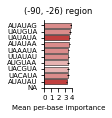

    motif  frequency     score   conf_lo   conf_hi         family  error_lo
0  AUAUAG       1261  3.750330  3.895358  3.605301  TA/TA-rich_d1  0.145029
1  UAUGUA       2251  3.675634  3.777439  3.573829  TA/TA-rich_d1  0.101805
2  UAUAUA       4504  3.565426  3.630327  3.500525  TA/TA-rich_d0  0.064901
3  AUAUAA       2447  3.551247  3.648999  3.453496  TA/TA-rich_d1  0.097751
4  UAAAUA       2525  3.442880  3.526925  3.358835  TA/TA-rich_d1  0.084045
5  UUAUAU       2362  3.440002  3.540074  3.339931  TA/TA-rich_d1  0.100072
6  AUGUAA        981  3.426412  3.579255  3.273570  TA/TA-rich_d2  0.152842
7  UACGUA        920  3.425741  3.565298  3.286184  TA/TA-rich_d2  0.139557
8  UACAUA       2112  3.386728  3.478735  3.294721  TA/TA-rich_d1  0.092007
9  AUAUAU       3459  3.222757  3.292066  3.153448  TA/TA-rich_d0  0.069309
3.8953584119965536


In [35]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][6]['hamming'], sigmots, 
                      (-90,-26), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, 
                      topn = 10, displaylist = ['AUAUAU'],
                      xlim = (0,4), xtickint = 1, verbose = True
                     )


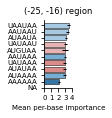

    motif  frequency     score   conf_lo   conf_hi         family  error_lo
0  UAAUAA        458  3.469267  3.631408  3.307125      A-rich_d2  0.162142
1  AAUAAU        391  3.340221  3.519748  3.160695      A-rich_d2  0.179526
2  AUAAUA        438  3.156321  3.318220  2.994423      A-rich_d2  0.161898
3  UAUAAU        365  3.014635  3.191244  2.838026  TA/TA-rich_d2  0.176609
4  AUGUAA        126  2.971141  3.424638  2.517644  TA/TA-rich_d2  0.453497
5  AAUAAA        498  2.958658  3.125551  2.791765      A-rich_d1  0.166893
6  UAUAAA        390  2.910913  3.090410  2.731415  TA/TA-rich_d1  0.179498
7  AUAUAA        370  2.898480  3.103067  2.693894  TA/TA-rich_d1  0.204586
8  AUAAAA        494  2.892506  3.045476  2.739537      A-rich_d1  0.152969
9  AAAAAA        352  2.144715  2.286509  2.002922      A-rich_d0  0.141794
3.6314083782617557


In [36]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][6]['hamming'], sigmots, 
                      (-25,-16), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, 
                      topn = 10, displaylist = ['AAAAAA'],
                      xlim = (0,4), xtickint = 1, verbose = True
                     )


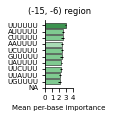

      motif  frequency     score   conf_lo   conf_hi     family  error_lo
136  UUUUUU        750  2.926032  3.022189  2.829876  T-rich_d0  0.096157
44   AUUUUU        678  2.565348  2.697331  2.433365  T-rich_d1  0.131983
53   CUUUUU        532  2.482960  2.636475  2.329446  T-rich_d1  0.153514
18   AAUUUU        363  2.389567  2.527147  2.251987  T-rich_d2  0.137580
90   UCUUUU        428  2.378561  2.529555  2.227567  T-rich_d1  0.150994
66   GUUUUU        314  2.344282  2.517214  2.171350  T-rich_d1  0.172932
86   UAUUUU        560  2.327673  2.454843  2.200503  T-rich_d1  0.127170
108  UUCUUU        401  2.216774  2.370724  2.062824  T-rich_d1  0.153950
103  UUAUUU        438  2.110887  2.238526  1.983248  T-rich_d1  0.127639
97   UGUUUU        270  2.071377  2.250430  1.892323  T-rich_d1  0.179054
3.0221889896095426


In [37]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][6]['hamming'], sigmots, 
                      (-15,-6), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,4), xtickint = 1, verbose = True
                     )


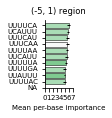

      motif  frequency     score   conf_lo   conf_hi     family  error_lo
128  UUUUCA        249  5.964963  6.248777  5.681148  T-rich_d2  0.283814
87   UCAUUU        171  5.796475  6.154598  5.438353  T-rich_d2  0.358123
118  UUUCAU        175  5.642589  6.002484  5.282695  T-rich_d2  0.359894
117  UUUCAA        149  5.634998  5.990503  5.279492      Other  0.355506
125  UUUUAA        199  5.544660  5.848741  5.240580  T-rich_d2  0.304081
104  UUCAUU        182  5.491166  5.884536  5.097797  T-rich_d2  0.393369
133  UUUUUA        382  5.357652  5.587350  5.127955  T-rich_d1  0.229698
131  UUUUGA        131  4.990416  5.395528  4.585304  T-rich_d2  0.405112
103  UUAUUU        342  4.948180  5.169002  4.727358  T-rich_d1  0.220822
126  UUUUAC        146  4.947583  5.327015  4.568150  T-rich_d2  0.379432
6.248777206169091


In [38]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][6]['hamming'], sigmots, 
                      (-5,1), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,7), xtickint = 1, verbose = True
                     )


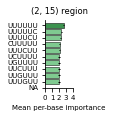

      motif  frequency     score   conf_lo   conf_hi     family  error_lo
136  UUUUUU       1014  2.672309  2.733175  2.611442  T-rich_d0  0.060866
134  UUUUUC        750  2.305883  2.397537  2.214230  T-rich_d1  0.091654
130  UUUUCU        645  2.231515  2.331989  2.131040  T-rich_d1  0.100474
53   CUUUUU        653  2.080366  2.187196  1.973535  T-rich_d1  0.106830
121  UUUCUU        626  2.062987  2.167268  1.958706  T-rich_d1  0.104281
90   UCUUUU        559  1.994954  2.105981  1.883926  T-rich_d1  0.111028
97   UGUUUU        302  1.981190  2.127493  1.834887  T-rich_d1  0.146303
108  UUCUUU        552  1.981044  2.093534  1.868554  T-rich_d1  0.112490
112  UUGUUU        291  1.968054  2.108668  1.827439  T-rich_d1  0.140614
124  UUUGUU        302  1.965644  2.112807  1.818481  T-rich_d1  0.147163
2.7331749597231405


In [39]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][6]['hamming'], sigmots, 
                      (2,15), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,4), xtickint = 1, verbose = True
                     )


## Motif crosstalk

#### Prepare motif location information

In [40]:
gold_motifs = {
    'EE' : {
        'motifs' : [m for m in sigmots if (scer_definitions['distance'][6]['hamming'].get(m, 'Other') in ['TA/TA-rich_d0','TA/TA-rich_d1'])],
        'region' : (-120,-26),
    },
    'PE' : {
        'motifs' : [m for m in sigmots if (scer_definitions['distance'][6]['hamming'].get(m, 'Other') in ['A-rich_d0','A-rich_d1'])],
        'region' : (-25,-16),
    },
    'UF' : {
        'motifs' : [m for m in sigmots if (scer_definitions['distance'][6]['hamming'].get(m, 'Other') in ['T-rich_d0','T-rich_d1'])],
        'region' : (-15,-6),
    },
    'DF' : {
        'motifs' : [m for m in sigmots if (scer_definitions['distance'][6]['hamming'].get(m, 'Other') in ['T-rich_d0','T-rich_d1'])],
        'region' : (2,15),
    },
}


In [41]:
gold_data = pd.read_csv(os.path.join(RESOURCES, "scer_golden_dist5.polya_comprehensive.txt"), sep = "\t")

gold_data['label']      = gold_data.apply(lambda row : f'{row.name:06d}:{row.chrom}:{row.start}:{row.strand}', axis = 1)
gold_data['sequence']   = gold_data['sequence'].apply(lambda x : x[int((len(x)-500)/2):int((len(x)+500)/2)].upper())
gold_data['idx_ctrclv'] = 250

print(gold_data.shape)


(11673, 20)


In [42]:
gold_data['idxs_EE'] = gold_data['sequence'].apply(lambda x : motifs.count_motifs(x, gold_motifs['EE']['motifs'], overlapping = False, preference = 'max', method = 'equal', count_only = False, index_only = True))
gold_data['idxs_PE'] = gold_data['sequence'].apply(lambda x : motifs.count_motifs(x, gold_motifs['PE']['motifs'], overlapping = False, preference = 'max', method = 'equal', count_only = False, index_only = True))
gold_data['idxs_UF'] = gold_data['sequence'].apply(lambda x : motifs.count_motifs(x, gold_motifs['UF']['motifs'], overlapping = False, preference = 'max', method = 'equal', count_only = False, index_only = True))
gold_data['idxs_DF'] = gold_data['sequence'].apply(lambda x : motifs.count_motifs(x, gold_motifs['DF']['motifs'], overlapping = False, preference = 'min', method = 'equal', count_only = False, index_only = True))


#### Number of upstream efficiency elements (UA-rich motifs)

In [43]:
gold_data['count_EE'] = gold_data.apply(lambda row : np.sum([((row['idx_ctrclv']-120) <= x < (row['idx_ctrclv']-25)) for x in row['idxs_EE']]), axis = 1)
print(gold_data['count_EE'].value_counts())


2     3202
3     3143
1     1837
4     1770
5      779
0      530
6      261
7       91
8       30
9       19
10       9
11       2
Name: count_EE, dtype: int64


In [44]:
ee_sum = gold_data['count_EE'].copy()
ee_sum[ee_sum >= 5] = 5

ee_sum = ee_sum.value_counts().reset_index().rename(columns = {'index' : 'number_EE', 'count_EE' : 'count'}).sort_values('number_EE')

ee_sum['prop']  = ee_sum['count'] / ee_sum['count'].sum()
ee_sum['label'] = ee_sum['number_EE'].astype(int).astype(str) + " (" + (ee_sum['prop']*100).round(1).astype(str) + "%)"


notebook_setup.py:6: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  import seaborn as sns


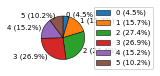

Corresponding data:


,number_EE,count,prop,label
5,0,530,0.045404,0 (4.5%)
2,1,1837,0.157372,1 (15.7%)
0,2,3202,0.274308,2 (27.4%)
1,3,3143,0.269254,3 (26.9%)
3,4,1770,0.151632,4 (15.2%)
4,5,1191,0.102030,5 (10.2%)


In [45]:
fig,ax = plt.subplots(1,1, figsize = (1,1))

wedges, texts = plt.pie(ee_sum['prop'], 
                        labels = ee_sum['label'],
                        startangle = 90, counterclock = False,
                        wedgeprops = {'linewidth' : 0.5, 'edgecolor' : 'black'}
                       )

ax.legend(wedges, ee_sum['label'],
          title="",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.savefig(os.path.join(OUTDIR, 'percent_sites_multiple_ee.stringent.pie.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


print("Corresponding data:")
ee_sum


### Analysis of motif crosstalk between degenerate *cis*-elements

In [46]:
gold_data['idx_UE'] = gold_data.apply(lambda row : motifs.select_motifs(row['idxs_EE'], index = 'second_last', region = gold_motifs['EE']['region'], relative = True, maxclv = row['idx_ctrclv']), axis = 1)
gold_data['idx_EE'] = gold_data.apply(lambda row : motifs.select_motifs(row['idxs_EE'], index = 'last',        region = gold_motifs['EE']['region'], relative = True, maxclv = row['idx_ctrclv']), axis = 1)
gold_data['idx_PE'] = gold_data.apply(lambda row : motifs.select_motifs(row['idxs_PE'], index = 'last',        region = gold_motifs['PE']['region'], relative = True, maxclv = row['idx_ctrclv']), axis = 1)
gold_data['idx_UF'] = gold_data.apply(lambda row : motifs.select_motifs(row['idxs_UF'], index = 'last',        region = gold_motifs['UF']['region'], relative = True, maxclv = row['idx_ctrclv']), axis = 1)
gold_data['idx_DF'] = gold_data.apply(lambda row : motifs.select_motifs(row['idxs_DF'], index = 'first',       region = gold_motifs['DF']['region'], relative = True, maxclv = row['idx_ctrclv']), axis = 1)

gold_data['testKey'] = gold_data.apply(lambda row: f'{row.name:06d}_{row["chrom"]}_{row["start"]}_{row["strand"]}', axis = 1)

gold_data['testKey_UE'] = gold_data.apply(lambda row: f'{row["testKey"]}|{row["idx_UE"]-row["idx_ctrclv"]}', axis = 1)
gold_data['testKey_EE'] = gold_data.apply(lambda row: f'{row["testKey"]}|{row["idx_EE"]-row["idx_ctrclv"]}', axis = 1)
gold_data['testKey_PE'] = gold_data.apply(lambda row: f'{row["testKey"]}|{row["idx_PE"]-row["idx_ctrclv"]}', axis = 1)
gold_data['testKey_UF'] = gold_data.apply(lambda row: f'{row["testKey"]}|{row["idx_UF"]-row["idx_ctrclv"]}', axis = 1)
gold_data['testKey_DF'] = gold_data.apply(lambda row: f'{row["testKey"]}|{row["idx_DF"]-row["idx_ctrclv"]}', axis = 1)

gold_pe_ee = gold_data.loc[~gold_data['idx_PE'].isna() & ~gold_data['idx_EE'].isna()].copy()
gold_pe_uf = gold_data.loc[~gold_data['idx_PE'].isna() & ~gold_data['idx_UF'].isna()].copy()
gold_pe_df = gold_data.loc[~gold_data['idx_PE'].isna() & ~gold_data['idx_DF'].isna()].copy()

gold_pe_ee['dist_PE_EE'] = gold_pe_ee['idx_EE'] - gold_pe_ee['idx_PE']
gold_pe_uf['dist_PE_UF'] = gold_pe_uf['idx_UF'] - gold_pe_uf['idx_PE']
gold_pe_df['dist_PE_DF'] = gold_pe_df['idx_DF'] - gold_pe_df['idx_PE']

gold_ee_ue = gold_data.loc[~gold_data['idx_EE'].isna() & ~gold_data['idx_UE'].isna() & (gold_data['idx_EE'] != gold_data['idx_UE'])].copy()

gold_ee_ue['dist_EE_UE'] = gold_ee_ue['idx_UE'] - gold_ee_ue['idx_EE']

print(gold_data.shape)
print("PE & EE:", gold_pe_ee.shape)
print("PE & UF:", gold_pe_uf.shape)
print("PE & DF:", gold_pe_df.shape)
print("EE & UE:", gold_ee_ue.shape)


(11673, 36)
PE & EE: (1732, 37)
PE & UF: (303, 37)
PE & DF: (505, 37)
EE & UE: (9306, 37)


In [47]:
single_panel_width_row1 = 0.85
single_panel_width_row2 = 1.00
double_panel_width = (single_panel_width_row1 * 2) + 0.5
single_panel_height = 1
upper_lower_panel_ratios = [2, 1]

ee_mfams = ['hamming_TA/TA-rich_d0', 'hamming_TA/TA-rich_d1']
pe_mfams = ['hamming_A-rich_d0', 'hamming_A-rich_d1']
uf_mfams = ['hamming_T-rich_d0', 'hamming_T-rich_d1']
df_mfams = ['hamming_T-rich_d0', 'hamming_T-rich_d1']


#### Crosstalk between the efficiency and positioning elements

In [48]:
fd_ee_pe = motifs.relative_position_motif_to_motif_importance(ee_mfams, pe_mfams, 'EE','PE',
                                                              'dist_PE_EE', 'idx_EE', 'idx_PE', 
                                                              'down_EE', 
                                                              mfam_importance[species][modeltype][config], 
                                                              gold_pe_ee)


Beginning Motif-Motif distance compilation for: ['hamming_TA/TA-rich_d0', 'hamming_TA/TA-rich_d1'] ['hamming_A-rich_d0', 'hamming_A-rich_d1']
down_EE dist_PE_EE idx_EE idx_PE
DISTANCE RANGE: -102 -1
-102	Freq =	1	1
-101 	Freq = 0	0
-100 	Freq = 0	0
-99	Freq =	1	1
-98	Freq =	2	2
-97	Freq =	2	2
-96	Freq =	2	2
-95	Freq =	1	1
-94	Freq =	1	1
-93	Freq =	1	1
-92	Freq =	5	5
-91	Freq =	1	1
-90	Freq =	1	1
-89	Freq =	1	1
-88	Freq =	2	2
-87	Freq =	1	1
-86	Freq =	2	2
-85	Freq =	2	2
-84	Freq =	1	1
-83	Freq =	1	1
-82	Freq =	1	1
-81	Freq =	2	2
-80	Freq =	1	1
-79	Freq =	2	2
-78	Freq =	2	2
-77	Freq =	1	1
-76	Freq =	2	2
-75 	Freq = 0	0
-74	Freq =	2	2
-73 	Freq = 0	0
-72	Freq =	2	2
-71	Freq =	2	2
-70	Freq =	2	2
-69	Freq =	3	3
-68	Freq =	2	2
-67	Freq =	5	5
-66	Freq =	3	3
-65	Freq =	8	8
-64	Freq =	5	5
-63	Freq =	2	2
-62	Freq =	5	5
-61	Freq =	9	9
-60	Freq =	6	6
-59	Freq =	5	5
-58	Freq =	5	5
-57	Freq =	4	4
-56	Freq =	9	9
-55	Freq =	3	3
-54	Freq =	13	13
-53	Freq =	3	3
-52	Freq =	11	11
-51	Freq =	9	9
-50	Freq =

Beginning frequency and score tabulation using: dist_PE_EE
Distance range covered: -102 -1
EE
(-22, 23.0)
(-21, 25.0)
(-20, 32.0)
(-19, 32.0)
(-18, 53.0)
(-17, 53.0)
(-16, 39.0)
(-15, 39.0)
(-14, 54.0)
(-13, 55.0)
(-12, 51.0)
(-11, 56.0)
(-10, 64.0)
(-9, 57.0)
(-8, 60.0)
(-7, 69.0)
(-6, 75.0)
(-5, 75.0)
(-4, 64.0)
(-3, 62.0)
(-2, 63.0)
(-1, 41.0)
(0, 28.0)
(1, 41.0)
(2, 15.0)
(-22, 23.0)
(-21, 25.0)
(-20, 32.0)
(-19, 32.0)
(-18, 53.0)
(-17, 53.0)
(-16, 39.0)
(-15, 39.0)
(-14, 54.0)
(-13, 55.0)
(-12, 51.0)
(-11, 56.0)
(-10, 64.0)
(-9, 57.0)
(-8, 60.0)
(-7, 69.0)
(-6, 75.0)
(-5, 75.0)
(-4, 64.0)
(-3, 62.0)
(-2, 63.0)
(-1, 41.0)
(0, 28.0)
(1, 41.0)
(2, 15.0)
Peak score: 4.876169662708503 @ position -18
Mean score: 3.6696652503648095
Peak frequency: 75.0 @ position -6
PE
(-22, 23.0)
(-21, 25.0)
(-20, 32.0)
(-19, 32.0)
(-18, 53.0)
(-17, 53.0)
(-16, 39.0)
(-15, 39.0)
(-14, 54.0)
(-13, 55.0)
(-12, 51.0)
(-11, 56.0)
(-10, 64.0)
(-9, 57.0)
(-8, 60.0)
(-7, 69.0)
(-6, 75.0)
(-5, 75.0)
(-4, 64.0)


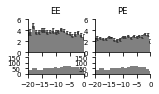

In [49]:
ee_pe_inputs = motifs.tabulate_motif_motif_distances(fd_ee_pe, gold_pe_ee, 'dist_PE_EE', 'EE', 'PE', overfill = None, flip = False, return_region = "neg")

motifs.plot_motif_motif_distances('mean', ee_pe_inputs, ['EE','PE'], 
                           'distance_ee_pe.positive', OUTDIR, 'gray', 1,
                           double_panel_width, single_panel_height, upper_lower_panel_ratios,
                           (-20,0), 5, (0,150), 50, (0,6), 2)


#### Crosstalk between the positioning element and upstream flanking U-rich elements

In [50]:
fd_pe_uf = motifs.relative_position_motif_to_motif_importance(pe_mfams, uf_mfams, 'PE', 'UF',
                                                              'dist_PE_UF', 'idx_PE', 'idx_UF', 
                                                              'down_PE', 
                                                              mfam_importance[species][modeltype][config], 
                                                              gold_pe_uf)


Beginning Motif-Motif distance compilation for: ['hamming_A-rich_d0', 'hamming_A-rich_d1'] ['hamming_T-rich_d0', 'hamming_T-rich_d1']
down_PE dist_PE_UF idx_PE idx_UF
DISTANCE RANGE: 5 19
5	Freq =	11	11
6	Freq =	24	24
7	Freq =	21	21
8	Freq =	21	21
9	Freq =	24	24
10	Freq =	30	30
11	Freq =	37	37
12	Freq =	29	29
13	Freq =	25	25
14	Freq =	27	27
15	Freq =	14	14
16	Freq =	14	14
17	Freq =	11	11
18	Freq =	5	5
19	Freq =	10	10


Beginning frequency and score tabulation using: dist_PE_UF
Distance range covered: 5 19
PE
(0.0, 24.0)
(1.0, 21.0)
(2.0, 21.0)
(3.0, 24.0)
(4.0, 30.0)
(5.0, 37.0)
(6.0, 29.0)
(7.0, 25.0)
(8.0, 27.0)
(9.0, 14.0)
(10.0, 14.0)
(11.0, 11.0)
(12.0, 5.0)
(13.0, 10.0)
(0.0, 24.0)
(1.0, 21.0)
(2.0, 21.0)
(3.0, 24.0)
(4.0, 30.0)
(5.0, 37.0)
(6.0, 29.0)
(7.0, 25.0)
(8.0, 27.0)
(9.0, 14.0)
(10.0, 14.0)
(11.0, 11.0)
(12.0, 5.0)
(13.0, 10.0)
Peak score: 3.780576326564823 @ position 7.0
Mean score: 2.8281125936018268
Peak frequency: 37.0 @ position 5.0
UF
(0.0, 24.0)
(1.0, 21.0)
(2.0, 21.0)
(3.0, 24.0)
(4.0, 30.0)
(5.0, 37.0)
(6.0, 29.0)
(7.0, 25.0)
(8.0, 27.0)
(9.0, 14.0)
(10.0, 14.0)
(11.0, 11.0)
(12.0, 5.0)
(13.0, 10.0)
(0.0, 24.0)
(1.0, 21.0)
(2.0, 21.0)
(3.0, 24.0)
(4.0, 30.0)
(5.0, 37.0)
(6.0, 29.0)
(7.0, 25.0)
(8.0, 27.0)
(9.0, 14.0)
(10.0, 14.0)
(11.0, 11.0)
(12.0, 5.0)
(13.0, 10.0)
Peak score: 3.161727255083398 @ position 9.0
Mean score: 2.1708221228191915
Peak frequency: 37.0 @ position 5.

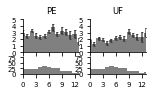

In [51]:
pe_uf_inputs = motifs.tabulate_motif_motif_distances(fd_pe_uf, gold_pe_uf, 'dist_PE_UF', 'PE', 'UF', overfill = "nan", flip = False, return_region = "pos")

motifs.plot_motif_motif_distances('mean', pe_uf_inputs, ['PE','UF'], 
                           'distance_pe_uf.positive', OUTDIR, 'gray', 1,
                           double_panel_width, single_panel_height, upper_lower_panel_ratios,
                           (0,13), 3, (0,75), 25, (0,5), 1)


#### Crosstalk between upstream efficiency elements

In [52]:
fd_ee_ue = motifs.relative_position_motif_to_motif_importance(ee_mfams, ee_mfams, 
                                                              'UE','EE',
                                                              'dist_EE_UE', 'idx_UE', 'idx_EE', 
                                                              'second_EE', 
                                                              mfam_importance[species][modeltype][config], 
                                                              gold_ee_ue)


Beginning Motif-Motif distance compilation for: ['hamming_TA/TA-rich_d0', 'hamming_TA/TA-rich_d1'] ['hamming_TA/TA-rich_d0', 'hamming_TA/TA-rich_d1']
second_EE dist_EE_UE idx_UE idx_EE
DISTANCE RANGE: -92 -6
-92	Freq =	1	1
-91 	Freq = 0	0
-90	Freq =	4	4
-89	Freq =	3	3
-88	Freq =	1	1
-87	Freq =	4	4
-86	Freq =	1	1
-85	Freq =	2	2
-84	Freq =	6	6
-83	Freq =	7	7
-82	Freq =	9	9
-81	Freq =	4	4
-80	Freq =	6	6
-79	Freq =	1	1
-78	Freq =	13	13
-77	Freq =	2	2
-76	Freq =	8	8
-75	Freq =	10	10
-74	Freq =	12	12
-73	Freq =	11	11
-72	Freq =	6	6
-71	Freq =	8	8
-70	Freq =	15	15
-69	Freq =	19	19
-68	Freq =	21	21
-67	Freq =	18	18
-66	Freq =	15	15
-65	Freq =	24	24
-64	Freq =	20	20
-63	Freq =	20	20
-62	Freq =	18	18
-61	Freq =	11	11
-60	Freq =	24	24
-59	Freq =	21	21
-58	Freq =	32	32
-57	Freq =	13	13
-56	Freq =	30	30
-55	Freq =	18	18
-54	Freq =	21	21
-53	Freq =	24	24
-52	Freq =	27	27
-51	Freq =	34	34
-50	Freq =	29	29
-49	Freq =	40	40
-48	Freq =	42	42
-47	Freq =	29	29
-46	Freq =	40	40
-45	Freq =	27	27
-44	Freq =	

Beginning frequency and score tabulation using: dist_EE_UE
Distance range covered: -92 -6
UE
(-22, 100.0)
(-21, 143.0)
(-20, 128.0)
(-19, 160.0)
(-18, 138.0)
(-17, 137.0)
(-16, 182.0)
(-15, 207.0)
(-14, 202.0)
(-13, 233.0)
(-12, 253.0)
(-11, 262.0)
(-10, 220.0)
(-9, 237.0)
(-8, 273.0)
(-7, 295.0)
(-6, 406.0)
(-5, 445.0)
(-4, 417.0)
(-3, 483.0)
(-2, 560.0)
(-1, 484.0)
(0, 1476.0)
(-22, 100.0)
(-21, 143.0)
(-20, 128.0)
(-19, 160.0)
(-18, 138.0)
(-17, 137.0)
(-16, 182.0)
(-15, 207.0)
(-14, 202.0)
(-13, 233.0)
(-12, 253.0)
(-11, 262.0)
(-10, 220.0)
(-9, 237.0)
(-8, 273.0)
(-7, 295.0)
(-6, 406.0)
(-5, 445.0)
(-4, 417.0)
(-3, 483.0)
(-2, 560.0)
(-1, 484.0)
(0, 1476.0)
Peak score: 3.5665756393504444 @ position -1
Mean score: 2.893477450299536
Peak frequency: 1476.0 @ position 0
EE
(-22, 100.0)
(-21, 143.0)
(-20, 128.0)
(-19, 160.0)
(-18, 138.0)
(-17, 137.0)
(-16, 182.0)
(-15, 207.0)
(-14, 202.0)
(-13, 233.0)
(-12, 253.0)
(-11, 262.0)
(-10, 220.0)
(-9, 237.0)
(-8, 273.0)
(-7, 295.0)
(-6, 406.0

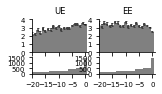

In [53]:
ee_ue_inputs = motifs.tabulate_motif_motif_distances(fd_ee_ue, gold_ee_ue, 'dist_EE_UE', 'UE', 'EE', overfill = None, flip = False, return_region = "neg")

motifs.plot_motif_motif_distances('mean', ee_ue_inputs, ['UE', 'EE'], 
                           'distance_ee_ue.positive', OUTDIR, 'gray', 1,
                           double_panel_width, single_panel_height, upper_lower_panel_ratios,
                           (-20,1), 5, (0,1500), 500, (0,4), 1)
